# Программа «Практический анализ данных и машинное обучение»
## Анализ социальных сетей: Центральности, дескриптивные статистики на сетях

Преподаватели: Шестаков Андрей, Докукина София

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import Image, display

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Сегодня мы рассмотрим рассчеты мер центральности для сети, которую некоторые видели на первом занятии: Zachary Karate Club.

Данная сеть имеет довольно [живую историю](https://en.wikipedia.org/wiki/Zachary's_karate_club) и её часто используют для демонстрации некоторых концептов SNA.

Напомним обозначения:
* $A$ - матрица смежности
* $A_{ij}$ - элемент на $i$-й строке и $j$-м столбце
* $v_i$ - $i$-я вершина
* $k(i)$ - степень вершины $v_i$
* $d(i, j)$ - расстояние между вершинами $v_i$ и $v_j$

In [2]:
# Утилька для рисования графов с лейблами
def plot_graph(g, settings=dict()):
    ig.plot(g, 'graph.png', **settings)
    display(Image(filename='graph.png'))

# Zachary Karate Club

Изобразим сеть без акцентов на важность вершин (в каком бы то ни было смысле).

Напомним себе, что люди под номерами `1` и `34` сыграли ключевую роль в дальнейшем распаде клуба.

In [4]:
g = ig.Graph.Famous('Zachary')
graph_layout = g.layout_fruchterman_reingold()

vision_settings = dict()
vision_settings['layout'] = graph_layout
vision_settings['vertex_label'] = range(1,35)

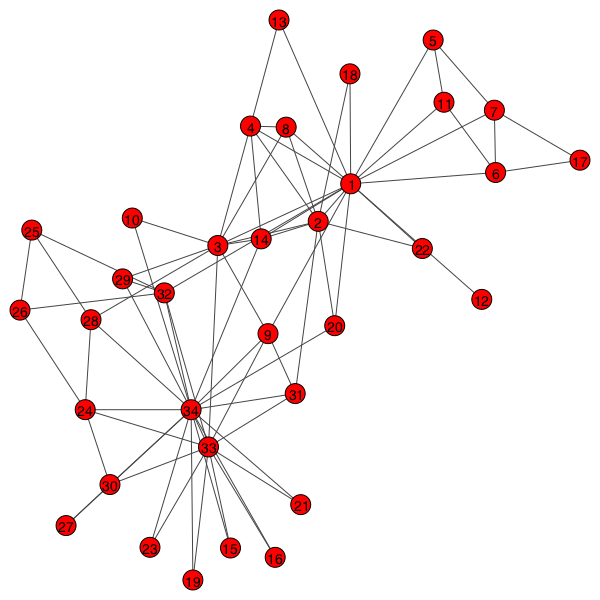

In [5]:
plot_graph(g, settings=vision_settings)

# Degree centrality

Самая оцевидная центральность - просто степень узла. Характеризует некоторую популярность узла (много друзей, много связей).

$$ C_d(i) = k(i) = \sum_jA_{ij} = \sum_iA_{ij}$$
$$ \bar{C}_d(i) = \frac{1}{n-1} C_d(i)$$

Существует обобщение на ориентированные (prestige) и взвешенные сети.

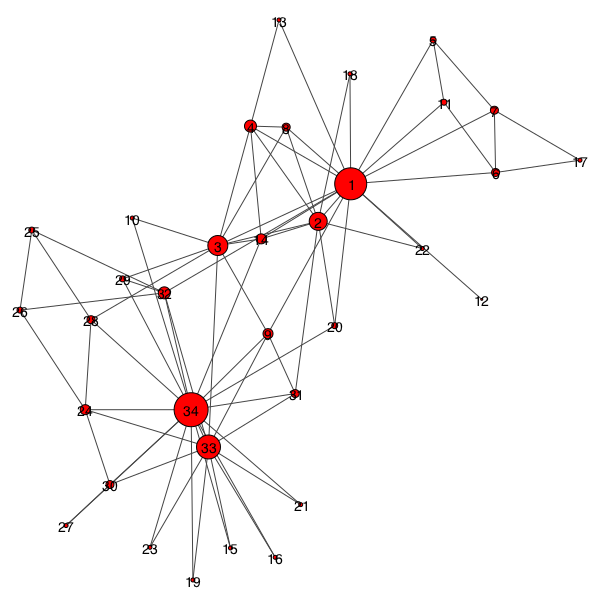

In [6]:
degr = g.degree()
vision_settings['vertex_size'] = np.array(degr) * 2

plot_graph(g, settings=vision_settings)

# Closeness centrality

Центральность, основанная на расстоянии до остальных вершин в графе.

$$ C_{cl}(i) = \frac{1}{\sum_j d(i,j)} $$

$$ \bar{C}_{cl}(i) = (n-1) \cdot C_{cl}(i) $$

Актор, расположенный в центре сети может быстро добраться до остальных акторов. Акторы на периферии расположены дальше.

**Вопрос:** что будет, если граф окажется несвязным?

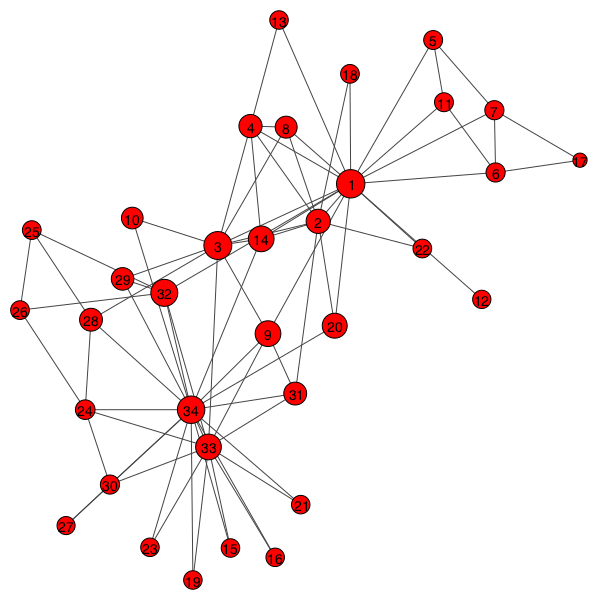

In [7]:
close = g.closeness(normalized=True)
vision_settings['vertex_size'] = np.array(close) * 50

plot_graph(g, settings=vision_settings)

# Betweenness centrality (nodes)

Пусть $\sigma_{st}$ - количество кратчайших путей между вершинами $s$ и $t$, а $\sigma_{st}(i)$ - кр. пути между $v_s$ и $v_t$, которые проходят через вершину $v_i$.

Тогда 
$$ C_b(i) = \sum\limits_{s\neq t\neq i} \frac{\sigma_{st}(i)}{\sigma_{st}} $$

$$ \bar{C}_b(i) = \frac{2}{(n-1)(n-2)}C_b(i) $$

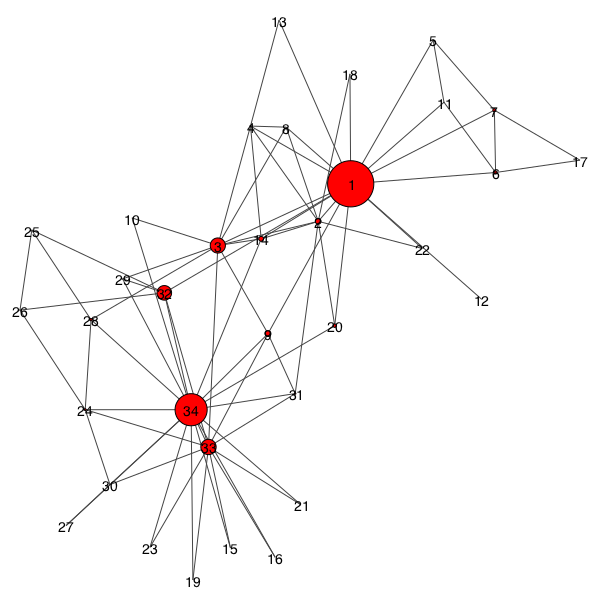

In [10]:
betw = np.array(g.betweenness(directed=False))
vision_settings['vertex_size'] = betw / 5

plot_graph(g, settings=vision_settings)

# Betweenness centrality (edges)

#### Задание
Betweenness также можно расчитывать для ребер! Давайте определим для каких ребер она наибольшая и что это может нам дать?

In [11]:
betw_edg = g.edge_betweenness(directed=False)
# Your code here

# Eigenvector centrality

Идея Eigenvector centrality в том, что "важность" текущей вершины должна зависеть от важности соседней с ней вершин

$$ v(i) = \frac{1}{\lambda}\sum_j A_ij v(j) $$
* $v_i$ - важность $i$-й вершины

Можно переписать в матричный вид:
$$Av = \lambda v$$
А это задача о собственном числе матрицы $A$! 

$$C_{eig} = v_1,$$
где v_1 - собственный вектор при наимбольшем собственном числе $\lambda_1$

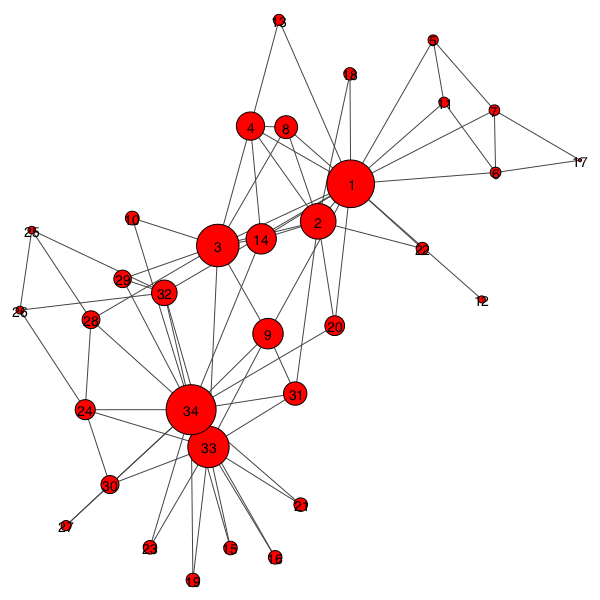

In [12]:
eig = g.eigenvector_centrality(directed=False)
vision_settings['vertex_size'] = np.array(eig) * 50
 
plot_graph(g, settings=vision_settings)

# Page Rank

Идея PageRank заключается в попытке описать блуждание по вершинам графа. Вероятность перехода в вершину $v_i$ обратнопропорциональна степеням входящих связанных с ней вершин.

$$p^{t+1} = (D^{-1}A)^\top p^t = P^\top p^t$$

Помимо случайного блуждания между соседними вершинами заложен механизм "телепорта" между случайными вершинами с вероятностью $1-\alpha$.

$$ \mathbb{P} = \alpha P + \frac{(1 - \alpha)}{n} E,$$
где $E$ - это матрица состоящая из единиц.

Аналогичным образом решается задача на поиск собственного числа

$$\mathbb{P}^\top p = \lambda p$$

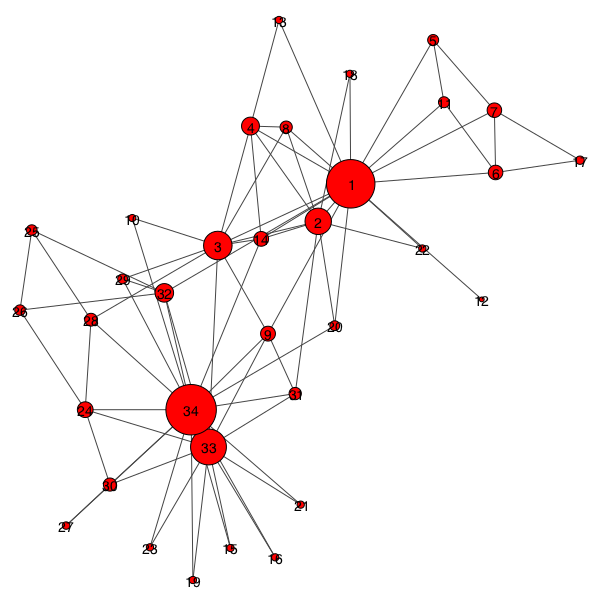

In [13]:
pr = g.pagerank(directed=False)
vision_settings['vertex_size'] = np.array(pr) * 500

plot_graph(g, settings=vision_settings)

#### Задание 
Сравните PageRank, EigenVector Centrality и Degree Centrality для данного графа. Какие выводы можно сделать?

In [14]:
# Your code here

# "Геометрическая" центральность

Eccentricity - максимальная длина кратчайшего пути из вершины $i$ до всех остальных вершин $e(i) = \max\limits_j d(i, j)$.

Диаметр - $\max e(i)$<br/>
Радиус - $\min e(i)$

Центральными вершинами являются те, у которых $e(i)$ равна радиусу графа

In [15]:
print g.radius()
print g.diameter()

3.0
5


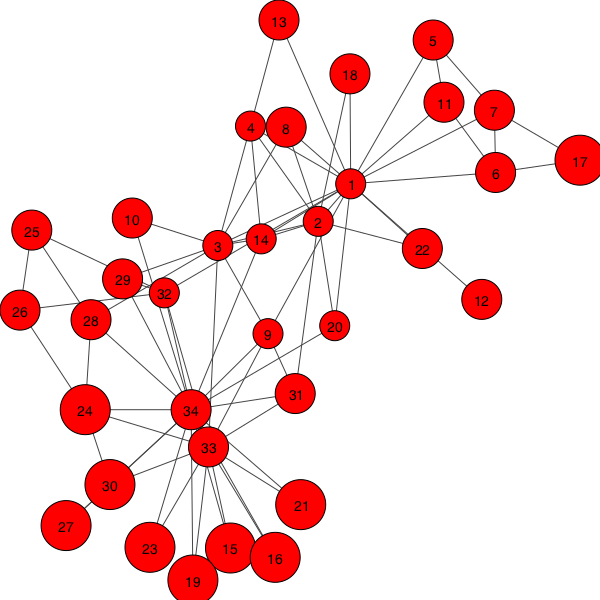

In [16]:
ecc = g.eccentricity()
vision_settings['vertex_size'] = np.array(ecc) * 10

plot_graph(g, settings=vision_settings)

# Clustering coefficient

Доля "треугольников" в окресности вершины.

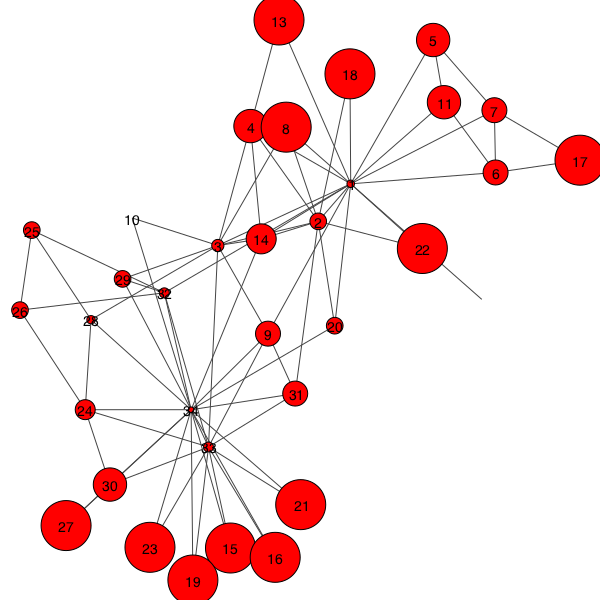

In [17]:
clust = g.transitivity_local_undirected()
vision_settings['vertex_size'] = np.array(clust) * 50
 
plot_graph(g, settings=vision_settings)

In [18]:
avg_clust = g.transitivity_avglocal_undirected()
clust_coeff = g.transitivity_undirected()

print 'Средний коэффициент кластеризации: %f' % avg_clust
print 'Глобальный коэффициент кластеризации: %f' % clust_coeff

Средний коэффициент кластеризации: 0.587931
Глобальный коэффициент кластеризации: 0.255682


# Структура сети без визуализации

#### Задание

На одном графике изобразите Closeness и Betwenneess Centalities. Как визуализация соотносятся с положением вершин в графе?

In [ ]:
## Your Code Here

# HITS + PageRank

####  Задание

Как мы выяснили, для неориентированного графа PageRank, Eigenvector, а уж темболее HITS не имеют особого смысла.

Рассмотрите граф связи политических блогов наканануне предыдущих выборов в США. Связь между вершинами имеет место если в постах одного блога были ссылки на другой блог.

* Проанализируйте структуру графа и почистите его перед расчетом центральностей
* Посчитайте PageRank и HITS
* Найдите топовые вершины по этим метрикам и изобразите их окресность

In [ ]:
## Your Code Here

# Ваши графы

Ваши графы в "сыром виде" лежат [тут](https://www.dropbox.com/sh/qtt4jbb6coqbgeh/AABuaXtKM4Qv0ipti_uQc_TPa?dl=0)

Один `json` файл содержит простое описание друзей, второй списки общих друзей с вашими непосредственными друзьями. Остается только преобразовать эту информацию для работы с igpraph ( или другим ПО для работы с сетями )

* Загрузите данные в тетрадку и преобразуйте их в граф
* Сохраните граф в формат GML для дальнейшей работы
* Посчитайте центральности и выясните, кто в вашем графе другей самый.. ээ.. центральный =)

In [23]:
import json

In [34]:
with open("/Users/dmitrys/Desktop/common_frients_91857120.json") as f:
    data = json.load(f)

In [78]:
mvi = {}
for i in data.keys():
    mvi[int(i)] = len(data[i])

In [79]:
G = {}
for key in data:
    G[int(key)] = data[key]

In [76]:
mvi = [val for sublist in data.values() for val in sublist]

In [89]:
mvi[7149054], mvi[4613116]

(18, 13)

In [90]:
graph= ig.Graph(edges= [(v,a) for v in G.keys() for a in G[v]])

In [91]:
plot_graph(graph, settings=vision_settings)

KeyboardInterrupt: 